Bank customers dataset (Churn_Modelling.csv) has about 10,000 customer information that can be used to decide whether the customer is likely to churn. There are multiple features. Identify which features are significant in determining whether the customer will churn. The last column, “Exited,” tells whether the customer stayed with the bank (Exited = 0) or left the bank (Exited = 1). Write a python code to design a three-layered ANN classifier that can predict whether the customer will churn for the test data set, which is 20% of the total dataset. Print the confusion matrix and accuracy, and then, submit the python code.

Be sure to encode the categorical data and perform the feature scaling. Use ‘relu’ activation for the first and second layers and ‘sigmoid’ for the last dense layer. For compiling, use ‘adam’ optimizer; and loss should be ‘binary_crossentropy’ as this is a binary classification problem.

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

In [34]:
# Load the dataset
data = pd.read_csv('Churn_Modelling.csv')


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [3]:
# finde the number of rows and columns
data.shape  

(10000, 14)

In [5]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
data.columns 

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [28]:
cat=data.select_dtypes('object')
for x in cat:
    print('{} = {}'.format(x, data[x].unique()))

Geography = ['France' 'Spain' 'Germany']
Gender = ['Female' 'Male']


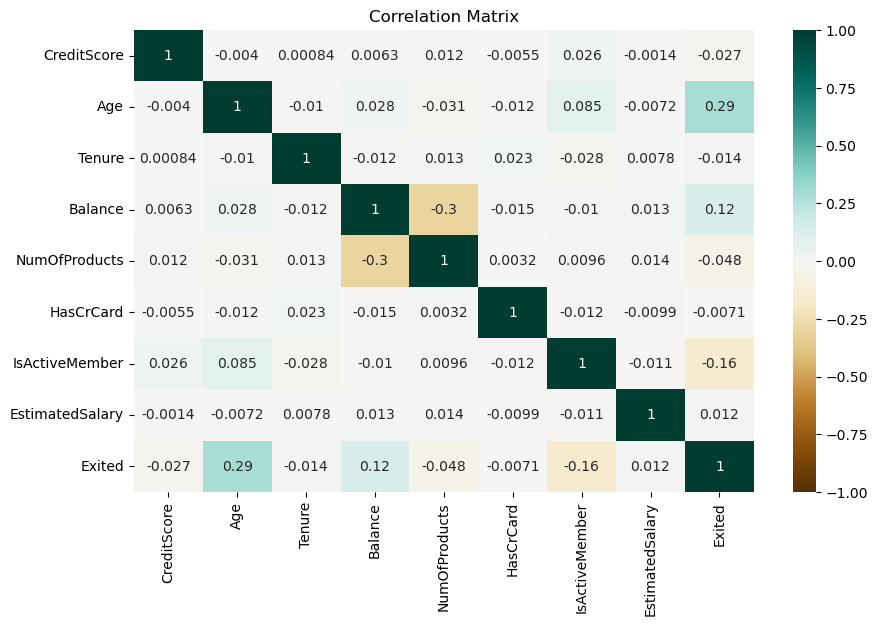

In [32]:
# Select only numeric columns
num_attributes = data.select_dtypes(include=['number'])

# Compute the correlation matrix on numeric data only
corr = num_attributes.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, cmap='BrBG', annot=True)
plt.title('Correlation Matrix')
plt.show()


In [18]:
# Drop unnecessary columns
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [19]:
# Extract features and target variable
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [20]:
# Encode the "Gender" column
labelencoder_X_1 = LabelEncoder()
X[:, 2] = labelencoder_X_1.fit_transform(X[:, 2])

In [21]:
# Encode the "Geography" column 
ct = ColumnTransformer([('encoder', OneHotEncoder(drop='first'), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X), dtype=np.float32)


In [22]:
# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


In [23]:
# Feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [24]:
# Initialize the ANN
model = Sequential()

# Add the input layer using the Input function
model.add(Input(shape=(11,)))

# Add the input layer and the first hidden layer
model.add(Dense(units=6, activation='relu'))

# Add the second hidden layer
model.add(Dense(units=6, activation='relu'))

# Add the output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compile the ANN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
# Train the ANN
model.fit(X_train, y_train, batch_size=10, epochs=100)

# Predict the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)


Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - accuracy: 0.7462 - loss: 0.5876
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.8084 - loss: 0.4503
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 534us/step - accuracy: 0.8230 - loss: 0.4139
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.8345 - loss: 0.3985
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 569us/step - accuracy: 0.8337 - loss: 0.3957
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 570us/step - accuracy: 0.8483 - loss: 0.3788
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.8544 - loss: 0.3556
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 569us/step - accuracy: 0.8449 - loss: 0.3734
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.8520 - loss: 0.3570
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.8559 - loss: 0.3571
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 549us/step - accuracy: 0.8602 - loss: 0.3483
Epoch 12/100
800/80

800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - accuracy: 0.8652 - loss: 0.3286
Epoch 68/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.8730 - loss: 0.3170
Epoch 69/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - accuracy: 0.8625 - loss: 0.3419
Epoch 70/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - accuracy: 0.8636 - loss: 0.3419
Epoch 71/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.8679 - loss: 0.3292
Epoch 72/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 548us/step - accuracy: 0.8657 - loss: 0.3264
Epoch 73/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 549us/step - accuracy: 0.8620 - loss: 0.3326
Epoch 74/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.8645 - loss: 0.3409
Epoch 75/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.8648 - loss: 0.3389
Epoch 76/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 530us/step - accuracy: 0.8666 - loss: 0.3291
Epoch 77/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 0s 529us/step - accuracy: 0.8603 - loss: 0.3377
Epoch 78/100
800/800 ━━

In [33]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{cm}')


Accuracy: 0.8615
Confusion Matrix:
[[1530   65]
 [ 212  193]]


Accuracy (86.15%): The model performs well overall, correctly predicting a large majority of instances.

True Negatives (TN): 1530

    These are the instances where the model correctly predicted that the customer did not churn.
    The model is effective at correctly identifying customers who will stay with the bank.

False Positives (FP): 65

    These are the instances where the model incorrectly predicted that the customer would churn, but they did not.
    There are relatively few customers that the model incorrectly identifies as churners. This indicates a low rate of false alarms.

False Negatives (FN): 212

    These are the instances where the model incorrectly predicted that the customer would not churn, but they did.
    The model has a moderate number of false negatives, meaning it misses some customers who actually churned. Reducing this number is critical because these are customers the bank would want to retain.

True Positives (TP): 193

    These are the instances where the model correctly predicted that the customer would churn.
    The model correctly identifies a good number of customers who will churn, allowing the bank to potentially take action to retain these customers.